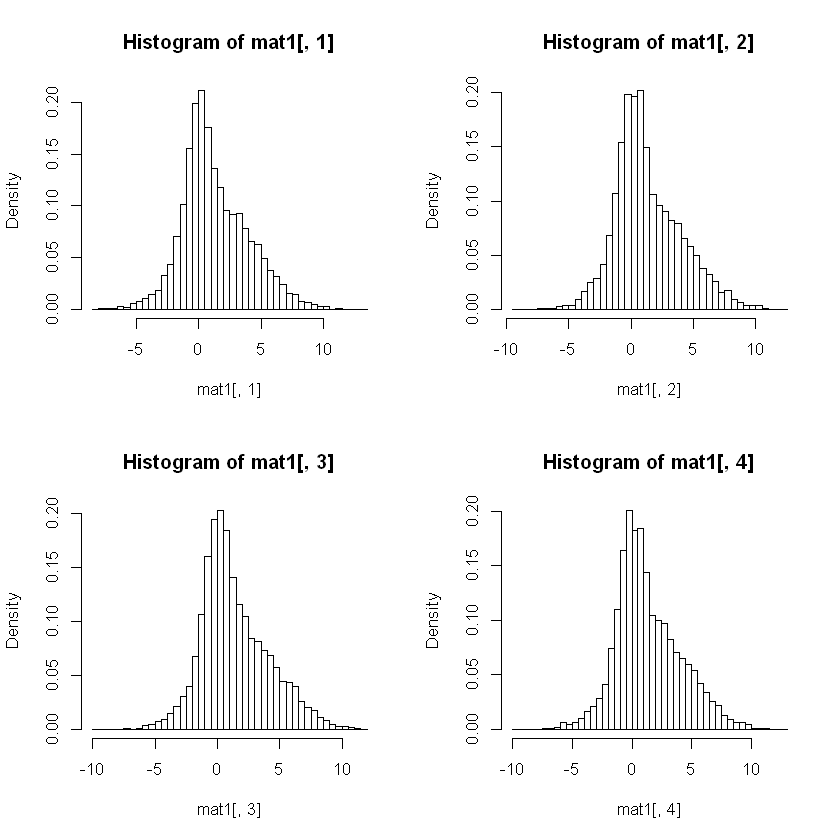

In [1]:

#1.1
mat1=matrix(,2500,100)
for (i in 1:2500){
  mat1[i,]=rnorm(100,0,1)
}

#1.2
mat2=matrix(,5000,100)
for (i in 1:5000){
  mat2[i,]=rnorm(100,2,3)
}

#1.3  
?par
mat1=rbind(mat1,mat2)
par(mfrow=c(2,2))
hg1=hist(mat1[,1],prob=T,breaks=50)
hg2=hist(mat1[,2],prob=T,breaks=50)
hg3=hist(mat1[,3],prob=T,breaks=50)
hg4=hist(mat1[,4],prob=T,breaks=50)

#1.4
mu=mean(mat1)
s=sd(mat1)
#Se observa que los datos tienen una asimetria casi igual a 0, su media es baja 1.33 y sd 2.6, parece que siguen una 
#distribucion normal, esto se debe al teorema de limite central que nos dice que una gran cantidad de datos em promedio
#tienen una distribucion normal


In [2]:
install.packages("readxl")
library("readxl")


package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\enriq\AppData\Local\Temp\RtmpgveL0N\downloaded_packages


Warning message:
"package 'readxl' was built under R version 3.6.3"

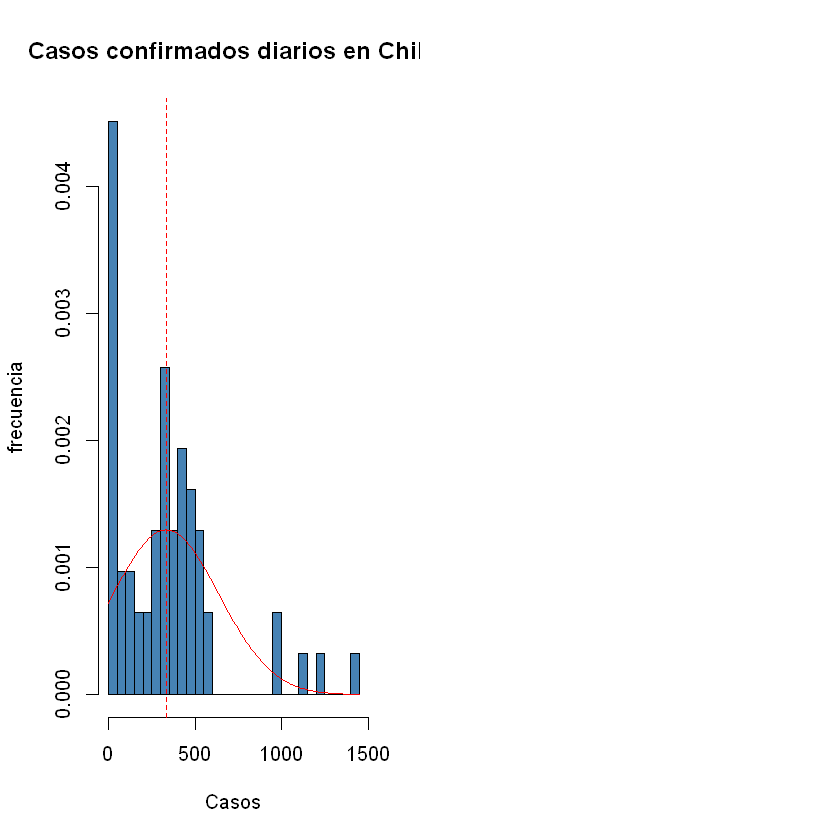

In [3]:
setwd("C:/Users/Enriq/Desktop/R univ")

data=read_excel("COVID-19-geographic-disbtribution-worldwide-2020-05-05.xlsx")

chile=data[data$countriesAndTerritories=="Chile",]
par(mfrow=c(1,2))

gchile=hist(chile$cases,prob=T,breaks=50,col = "steelblue",ylab = "frecuencia",xlab="Casos",main="Casos confirmados diarios en Chile")
mediach=mean(chile$cases)
sch=sd(chile$cases)
curve(dnorm(x,mediach,sch),add=TRUE,col=2)
abline(v=mean(chile$cases),col=2,lty=8)

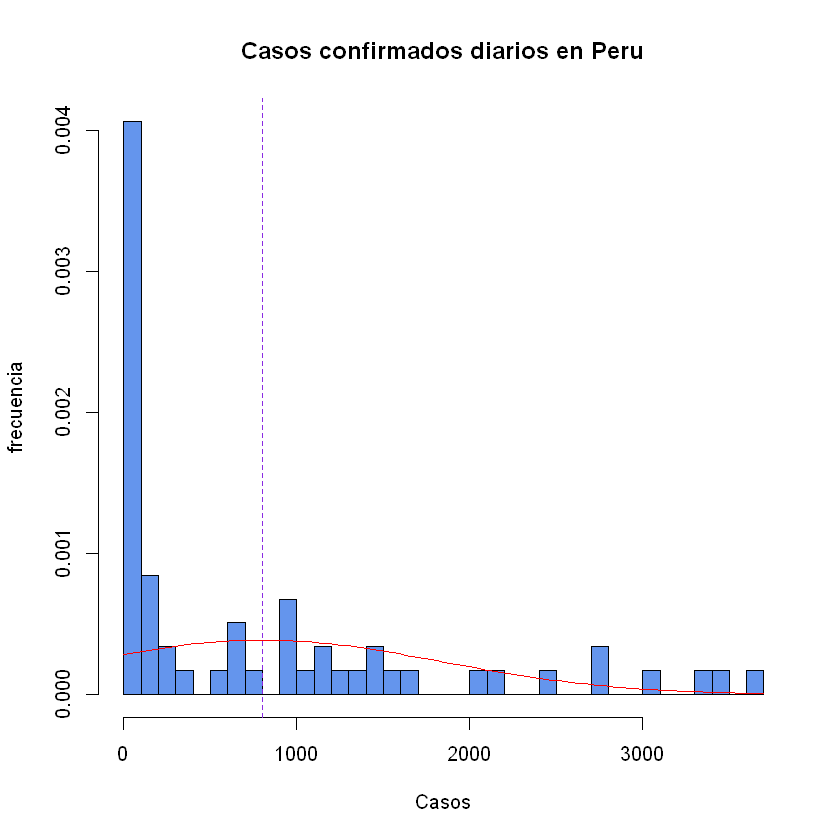

In [4]:
peru=data[data$countriesAndTerritories=="Peru",]
gperu=hist(peru$cases,prob=T,breaks=50,col = "cornflowerblue",ylab = "frecuencia",xlab="Casos",main="Casos confirmados diarios en Peru")
mediape=mean(peru$cases)
spe=sd(peru$cases)
curve(dnorm(x,mediape,spe),add=TRUE,col=2)
abline(v=mean(peru$cases),col="blueviolet",lty=8)


In [5]:

data=read_excel("COVID-19-geographic-disbtribution-worldwide-2020-05-05.xlsx")
#ordenando la data para poder tener el acumulado por pais
data=data[order(data$dateRep,decreasing = F),]
data=data[order(data$countriesAndTerritories,decreasing = F),]
str(data$dateRep)



 POSIXct[1:15074], format: "2019-12-31" "2020-01-01" "2020-01-02" "2020-01-03" "2020-01-04" ...


In [6]:
#generando el acumulado de casos
m=dim(data)[1]
d1=as.character(data$dateRep)
acumulado_confirmados=matrix(rep(0,m),m,1)
data=cbind(data,acumulado_confirmados)
#llenando la columna de acumulado_confirmados
for(i in 1:m){
  if(i<m-1){
    if(d1[i]=="2020-05-05"){
      data$acumulado_confirmados[i+1]=data$cases[i+1]
      data$acumulado_confirmados[i]=data$cases[i]+data$acumulado_confirmados[i-1]
    }
    else if(i>1){
      data$acumulado_confirmados[i+1]=data$cases[i+1]+data$acumulado_confirmados[i]}
  }
}



In [7]:
#acumulado de muertes
m=dim(data)[1]
acumulado_muertes=matrix(rep(0,m),m,1)
data=cbind(data,acumulado_muertes)
#llenando la columna de acumulado_muertes
for(k in 1:m){
  if(k<m-1){
    if(d1[k]=="2020-05-05"){
      data$acumulado_muertes[k+1]=data$deaths[k+1]
      data$acumulado_muertes[k]=data$deaths[k]+data$acumulado_muertes[k-1]
    }
    else if(k>1){
      data$acumulado_muertes[k+1]=data$deaths[k+1]+data$acumulado_muertes[k]}
  }
}



In [8]:
#3.1

#3.1 Generando las bases de chile y peru
chile_order=data[data$countriesAndTerritories=="Chile",]
peru_order=data[data$countriesAndTerritories=="Peru",]

#3.2
#casos confirmado por millon chile
acumulado_confirmados_ch_millon=round(chile_order$acumulado_confirmados*1000000/chile_order$popData2018,0)
chile_order=cbind(chile_order,acumulado_confirmados_ch_millon)
#muertes por millon chile
acumulado_muertes_ch_millon=round(chile_order$acumulado_muertes*1000000/chile_order$popData2018,0)
chile_order=cbind(chile_order,acumulado_muertes_ch_millon)

#casos confirmados por millon Peru
acumulado_confirmados_pe_millon=round(peru_order$acumulado_confirmados*1000000/peru_order$popData2018,0)
peru_order=cbind(peru_order,acumulado_confirmados_pe_millon)
#muertes por millon Peru
acumulado_muertes_pe_millon=round(peru_order$acumulado_muertes*1000000/peru_order$popData2018,0)
peru_order=cbind(peru_order,acumulado_muertes_pe_millon)



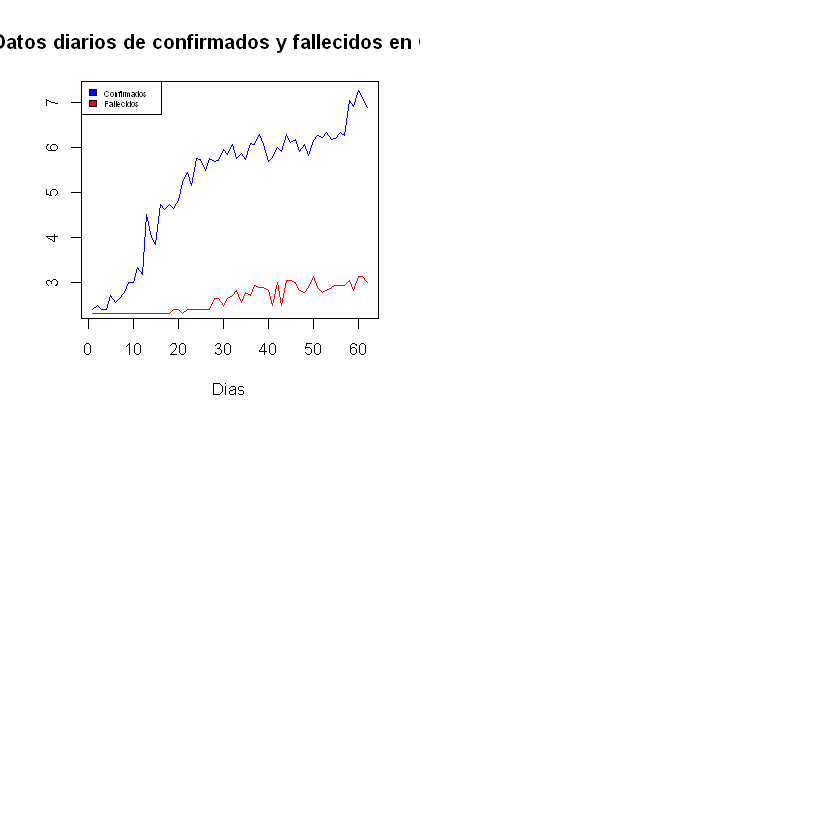

In [9]:
#3.3
par(mfrow=c(2,2))
#CHILE
#a
y1=log(chile_order$cases+10)
y2=log(chile_order$deaths+10)
x1=1:length(y1)
plot(x1,y1,type="l",col="blue",xlab="Dias",ylab="",main="Datos diarios de confirmados y fallecidos en Chile")
lines(x1,y2,col="red")
legend("topleft",c("Confirmados","Fallecidos"),fill=c("blue","red"),cex=0.5)





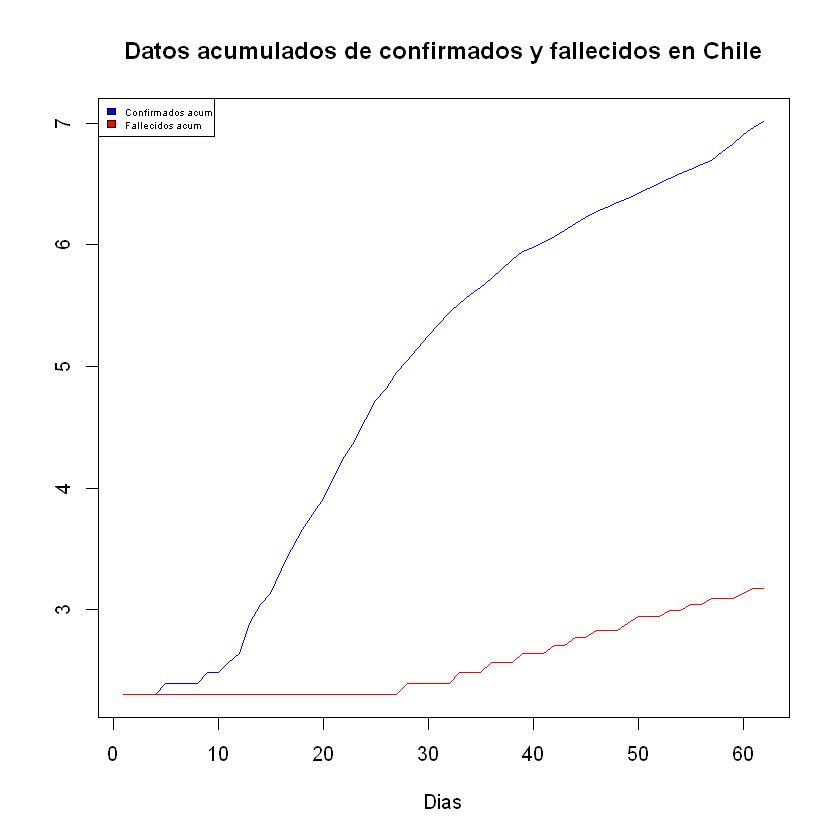

In [10]:
#b
y3=log(acumulado_confirmados_ch_millon+10)
y4=log(acumulado_muertes_ch_millon+10)
x2=1:length(y3)
plot(x2,y3,type="l",col="blue",xlab="Dias",ylab="",main="Datos acumulados de confirmados y fallecidos en Chile")
lines(x2,y4,col="red")
legend("topleft",c("Confirmados acum","Fallecidos acum"),fill=c("blue","red"),cex=0.5)


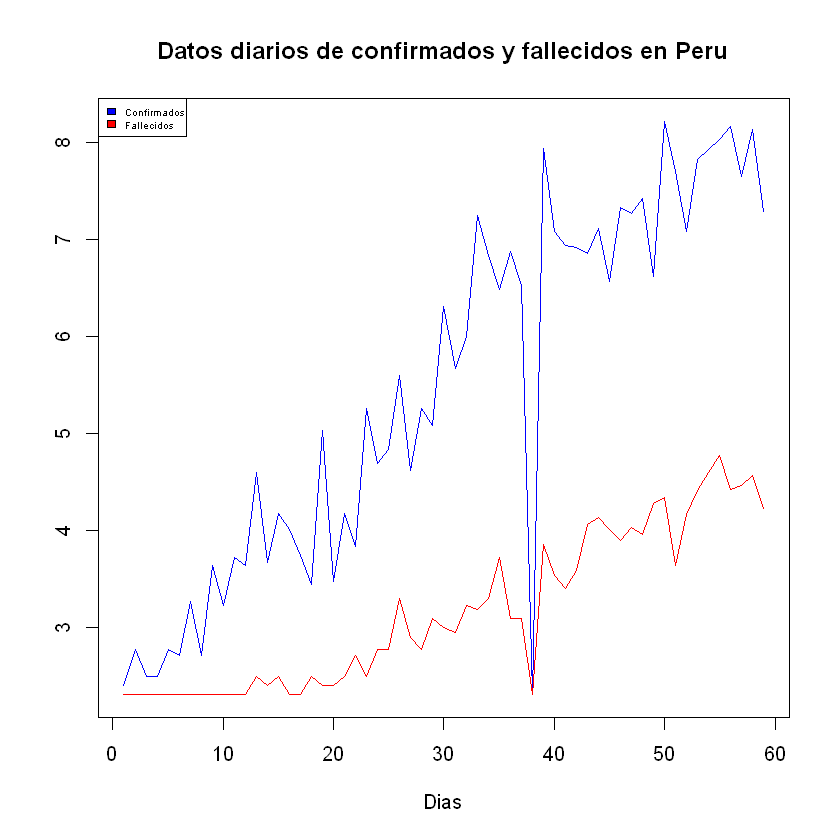

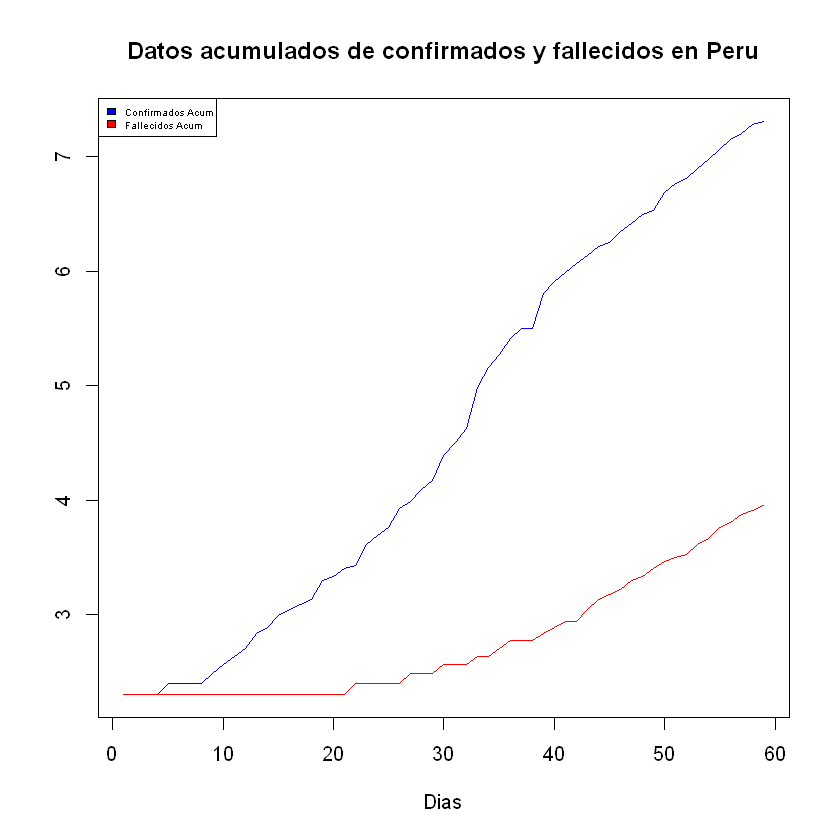

In [11]:

#PERU
#c
p1=log(peru_order$cases+10)
p2=log(peru_order$deaths+10)
le1=1:length(p1)
plot(le1,p1,type="l",col="blue",ylab="",xlab="Dias",main="Datos diarios de confirmados y fallecidos en Peru")
lines(le1,p2,col="red")
legend("topleft",c("Confirmados","Fallecidos"),fill=c("blue","red"),cex=0.5)

#d
p3=log(acumulado_confirmados_pe_millon+10)
p4=log(acumulado_muertes_pe_millon+10)
le2=1:length(p3)
plot(le2,p3,type="l",col="blue",ylab="",xlab="Dias",main="Datos acumulados de confirmados y fallecidos en Peru")
lines(le2,p4,col="red")
legend("topleft",c("Confirmados Acum","Fallecidos Acum"),fill=c("blue","red"),cex=0.5)



In [12]:
#3.4
#chile medias
#casos
media_diaria_chile_casos=mean(chile_order$cases)
media_acumulada_chile_casos=mean(chile_order$acumulado_confirmados)
#muertes
media_diaria_chile_muertes=mean(chile_order$deaths)
media_acumulada_chile_muertes=mean(chile_order$acumulado_muertes)

#chile desviaciones
#casos
sd_diaria_chile_casos=sd(chile_order$cases)
sd_acumulada_chile_casos=sd(chile_order$acumulado_confirmados)
#muertes
sd_diaria_chile_muertes=sd(chile_order$deaths)
sd_acumulada_chile_muertes=sd(chile_order$acumulado_muertes)


#peru medias
#casos
media_diaria_peru_casos=mean(peru_order$cases)
media_acumulada_peru_casos=mean(peru_order$acumulado_confirmados)
#muertes
media_diaria_peru_muertes=mean(peru_order$deaths)
media_acumulada_peru_muertes=mean(peru_order$acumulado_muertes)

#chile desviaciones
#casos
sd_diaria_peru_casos=sd(peru_order$cases)
sd_acumulada_peru_casos=sd(peru_order$acumulado_confirmados)
#muertes
sd_diaria_peru_muertes=sd(peru_order$deaths)
sd_acumulada_peru_muertes=sd(peru_order$acumulado_muertes)

#Respecto a las medias acumulada
#Se observa que la media de casos acumulados en Peru es 10048, el doble respecto a chile(5775), esto se puede justificar debido a que el peru tiene 
#casi el doble de poblacion, lo mismo ocurre en la media de muertes acumulada Peru(273) vs Chile(69). Esta diferencia tambien
#se puede enteder porque Peru presenta mayor numero de casos diarios y muertes lo que aumenta su acumulado

#Medias diarias
#Se observa que Peru en media tiene 802 casos diarios vs Chile 332, respecto a las muertes Peru tiene en promedio 22 muertes diarias vs 4 muertes 
#en Chile, la justificacion puede ser la poblacion de Peru es mayor por ello persenta mayor cantidad, ademas, respecto}
#a las muertes se podria intuir que Peru tiene un peor sistema de salud 


# Sd diarias y acumuladas
# Peru tiene una mayor desviacion respecto a casos y muertes tando diarias como acumuladas, esto significa que sus datos tienen
#una mayor dispersion ( tal vez que no se logra reducir el numero de contagios ni muertes)
